<a href="https://colab.research.google.com/github/abd-04/CNN_cifar10/blob/main/NN_cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# lib import


import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization,Activation
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.regularizers import l2


In [ ]:
# Class names for labels
class_names = ["airplane", "automobile", "bird", "cat", "deer",
               "dog", "frog", "horse", "ship", "truck"]

(50000, 32, 32, 3) → the whole dataset

(32, 32, 3) → one image

(32, 3) → one row of pixels from that image

(3,) → one pixel (R, G, B)

In [ ]:
# Load CIFAR-10 (50k train, 10k test)
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

# Train/Validation split (10% validation)
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(
    X_train, Y_train, test_size=0.1, random_state=42
)

print("Train:", X_train.shape)
print("Validation:", X_val.shape)
print("Test:", X_test.shape)


Train: (45000, 32, 32, 3)
Validation: (5000, 32, 32, 3)
Test: (10000, 32, 32, 3)


In [ ]:
# Flatten and cast to int
#Y_train = Y_train.reshape(-1).astype(int)   # (45000,)
#Y_validation   = Y_validation.reshape(-1).astype(int)     # (5000,)
#Y_test  = Y_test.reshape(-1).astype(int)    # (10000,)

# One-hot encode
#classes = 10
#Y_train = np.eye(classes)[Y_train]   # (45000, 10)
#Y_validation= np.eye(classes)[Y_validation]     # (5000, 10)
#Y_test  = np.eye(classes)[Y_test]    # (10000, 10)

#print("Y_train shape:", Y_train.shape)
#print("Y_val shape:", Y_validation.shape)
#print("Y_test shape:", Y_test.shape)

classes = 10

Y_train = tf.keras.utils.to_categorical(Y_train, classes)
Y_val   = tf.keras.utils.to_categorical(Y_val, classes)
Y_test  = tf.keras.utils.to_categorical(Y_test, classes)

print("Y_train:", Y_train.shape)
print("Y_val:", Y_val.shape)
print("Y_test:", Y_test.shape)



Y_train: (45000, 10)
Y_val: (5000, 10)
Y_test: (10000, 10)


In [ ]:
# Data augmentation + normalization
datagen = ImageDataGenerator(
    rescale=1/255,              # normalize inside generator
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    zoom_range=0.1
)


# Validation and test normalization
X_val = X_val / 255.0
X_test = X_test / 255.0


In [ ]:


model = Sequential([
    Conv2D(32, (3,3), padding='same', input_shape=(32,32,3)),#conv1
    BatchNormalization(),
    Activation('relu'),

    Conv2D(32, (3,3), padding='same'), #conv2
    BatchNormalization(),
    Activation('relu'),

    MaxPooling2D(), # pool1
    Dropout(0.25),

    Conv2D(64, (3,3), padding='same'), #conv3
    BatchNormalization(),
    Activation('relu'),

    Conv2D(64, (3,3), padding='same'), #conv4
    BatchNormalization(),
    Activation('relu'),

    MaxPooling2D(), #pool2
    Dropout(0.25),

    Flatten(),

    Dense(512),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.5),

    Dense(10, activation='softmax')
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0003)

model.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     2,097,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴─────────────

 Total params: 2,171,178 (8.28 MB)

 Trainable params: 2,169,770 (8.28 MB)

 Non-trainable params: 1,408 (5.50 KB)

In [ ]:
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)


history = model.fit(
    datagen.flow(X_train, Y_train, batch_size=96),
    epochs=60,
    validation_data=(X_val, Y_val),
    callbacks=[early_stop]
)

model.save("cifar10_model.h5")


Epoch 1/60


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


469/469 ━━━━━━━━━━━━━━━━━━━━ 48s 81ms/step - accuracy: 0.3210 - loss: 2.0629 - val_accuracy: 0.3752 - val_loss: 1.8283
Epoch 2/60
469/469 ━━━━━━━━━━━━━━━━━━━━ 31s 65ms/step - accuracy: 0.4733 - loss: 1.4832 - val_accuracy: 0.5224 - val_loss: 1.3758
Epoch 3/60
469/469 ━━━━━━━━━━━━━━━━━━━━ 30s 64ms/step - accuracy: 0.5365 - loss: 1.3024 - val_accuracy: 0.6122 - val_loss: 1.0823
Epoch 4/60
469/469 ━━━━━━━━━━━━━━━━━━━━ 30s 64ms/step - accuracy: 0.5794 - loss: 1.1694 - val_accuracy: 0.6224 - val_loss: 1.0594
Epoch 5/60
469/469 ━━━━━━━━━━━━━━━━━━━━ 30s 65ms/step - accuracy: 0.6087 - loss: 1.0947 - val_accuracy: 0.5768 - val_loss: 1.2249
Epoch 6/60
469/469 ━━━━━━━━━━━━━━━━━━━━ 31s 65ms/step - accuracy: 0.6422 - loss: 1.0186 - val_accuracy: 0.6908 - val_loss: 0.8728
Epoch 7/60
469/469 ━━━━━━━━━━━━━━━━━━━━ 29s 63ms/step - accuracy: 0.6568 - loss: 0.9708 - val_accuracy: 0.6676 - val_loss: 0.9287
Epoch 8/60
469/469 ━━━━━━━━━━━━━━━━━━━━ 31s 66ms/step - accuracy: 0.6709 - loss: 0.9337 - val_accurac

In [ ]:
test_loss, test_acc = model.evaluate(X_test, Y_test)
print("Final Test Accuracy:", test_acc)


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8275 - loss: 0.4945
Final Test Accuracy: 0.8312000036239624


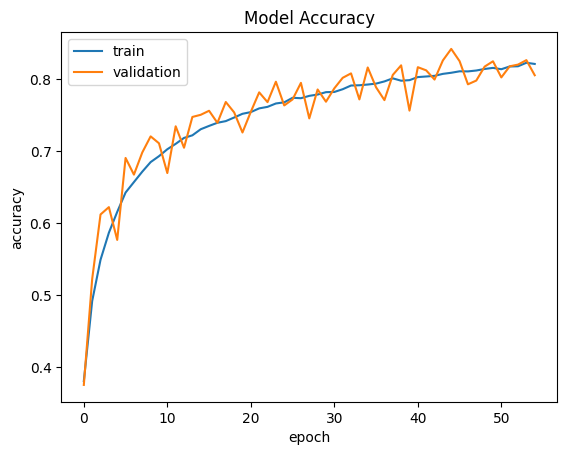

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.show()


In [ ]:
y_pred = model.predict(X_test[:5])
print("Predicted classes:", np.argmax(y_pred, axis=1))
print("True classes:", np.argmax(Y_test[:5], axis=1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 745ms/step
Predicted classes: [3 8 8 0 6]
True classes: [3 8 8 0 6]


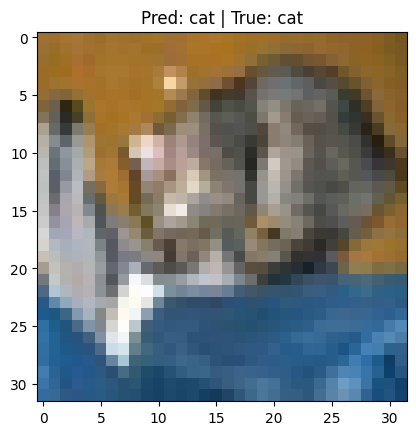

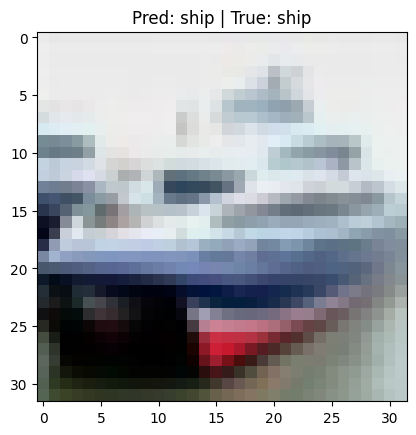

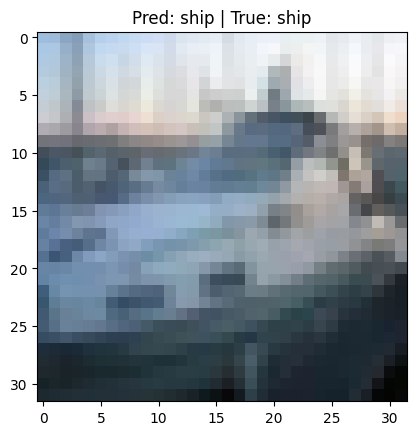

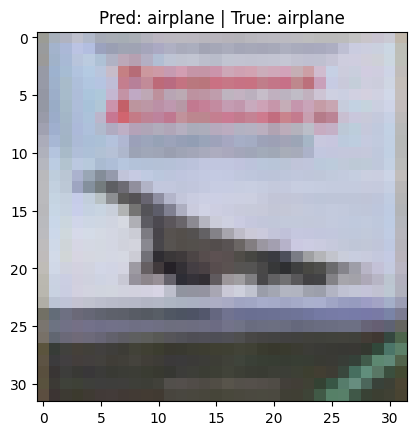

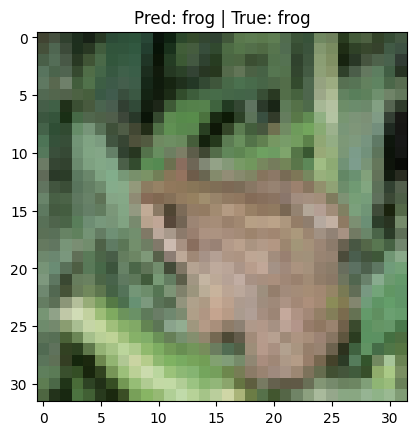

In [ ]:
import matplotlib.pyplot as plt

class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

for i in range(5):
    plt.imshow(X_test[i])
    plt.title(f"Pred: {class_names[np.argmax(y_pred[i])]} | True: {class_names[np.argmax(Y_test[i])]}")
    plt.show()
